Préambule python :

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, cos, sin, exp, pi
from scipy.integrate import odeint

# <font color='red'> TD Modélisation 2 :  Modéliser des évolutions biologiques / statistiques
##  <font color='green'> Première partie :  le modèle de Lotka-Voltera <font color='black'>
Le modèle de Lokta-Voltera, aussi nommé "modèle proies-prédateurs", est un modèle d'écologie mathématiques, permettant de décrire l'évolution simultanée de deux populations : la population des  proies, et celle des prédateurs. Il a été proposé dans les années 1920 independamment par Alfred James Lotka et Vito Volterra. Historiquement, le premier l'a proposé pour modéliser les fluctuations périodiques de concentrations d'espèces chimiques observées dans certaines réactions. Le deuxième pour expliquer les proportions fluctuantes de poissons péchés dans l'Adriatique.
    
Expliquons ce modèle : lorsque les prédateurs sont peu nombreux, la population des proies s'accroît rapidement. Les prédateurs se développent à leur tour car leur subsistance est largement assurée, mais ils finissent par être si nombreux que la population des proies décline, décimées. Manquant de nourriture, les prédateurs se mettent à diminuer à leur tour jusqu'à ce que leur faible nombre permette le redémarrage de la population des proies et de l'ensemble du cycle. La population des proies passe donc par un maximum avant celle des prédateurs.
    
Ce modèle, premier d'une longue série de modèles mathématiques/physique appliqués à la biologie, connu une confirmation remarquable avec les statistiques de la Compagnie de la baie d'Hudson, livrées en 1942, sur le nombre de peaux de lièvres des neiges et de lynx livrées chaque année par les trappeurs entre 1845 et 1935. On constate effectivement une fluctuation presque régulière de la population des lièvres et de celle des lynx qui en vivent.

![image](im/graphe_lv.png)

En réalité, il a été montré plus tard que l'influence de l'homme (en articulier des trappeurs) est prépondérante pour expliquer ces données...
Pour fixer les choses, nous considérerons l'exemple des intéractions Lapins / Renards :  on note alors $R(t)$ le nombre de renards et $L(t)$ le nombre de lapins à l'instant $t$.
D'après le modèle de Lotka-Voltera, l'évolution de ces deux fonctions obéissent aux équations différentielle couplées suivantes :
$$\begin{cases}
\dot{L}(t) = a.L(t)-c.L(t).R(t) = f(L(t),R(t),t)\\
\dot{R}(t) = -b.R(t) + d.L(t).R(t) = g(L(t),R(t),t)
\end{cases}$$
avec $a$, $b$, $c$ et $d$ des coefficients positifs.

**Question 1 :** Expliquer chacun des termes de ces équations.

*Aide : pour comprendre le coefficient $a$, on peut considérer que $R(t)=0$, et pour comprendre le coefficient $b$, on peut considérer que $L(t)=0$.*

*Correction :*

- en l'absence de prédateurs,  le nombre de proies croît indéfiniment, en suivant le modèle exponentiel

- en l'absence de proies, le nombre de prédateurs décroît indéfiniment,  en suivant le modèle exponentiel;

- le taux d'accroissement des proies diminue en proportion du nombre de prédateurs, l'interactionentre les proies et les prédateurs conduit à une diminution du nombre de proies. Cette diminution est proportionnelle au nombre de rencontres entre les proies et les prédateurs, donc proportionnelle au produitdu nombre de prédateurs par le nombre de proies

- la même interaction conduit à une augmentation du nombre de prédateurs. Cette augmentationest proportionnelle au nombre de rencontres entre les proies et les prédateurs, donc proportionnelle auproduit du nombre de prédateurs par le nombre de proies.


**Question 2 :**
Ecrire la fonction `Euler_LV(a,b,c,d,Li,Ri,tf,n)` retournant les listes `T`, `L` et `R`, grâce à la méthode d'Euler, appliquée entre *t<sub>i</sub> = 0* et *t<sub>f</sub>*, pour $n$ points, avec pour conditions initiales `Li` = $L (0)$  et `Ri` = $R (0) $ .

In [2]:
def Euler_LV(a,b,c,d,Li,Ri,tf,n):
    T=[0]
    L=[Li]
    R=[Ri]
    h = tf / (n-1)
    for i in range(n-1):
        T.append(T[-1]+h)
        L.append((a*h+1)*L[-1]-c*h*L[-1]*R[-1])
        R.append((1-h*b)*R[-1]+d*h*L[-2]*R[-1])
    return T,L,R

**Question 3 :** Tracer les graphes des solutions pour $a = 0,2$, $b = 0,3$, $c = 0,1$, $d=0,15$ et $t_f = 200$. On fera en sorte de prendre  $\frac{n}{t_f}>50$. On fera deux figure :
- une pour $L(0) = 2$ et $R(0) = 1$,
- l'autre pour $L(0) = 2$ et $R(0) = 20$

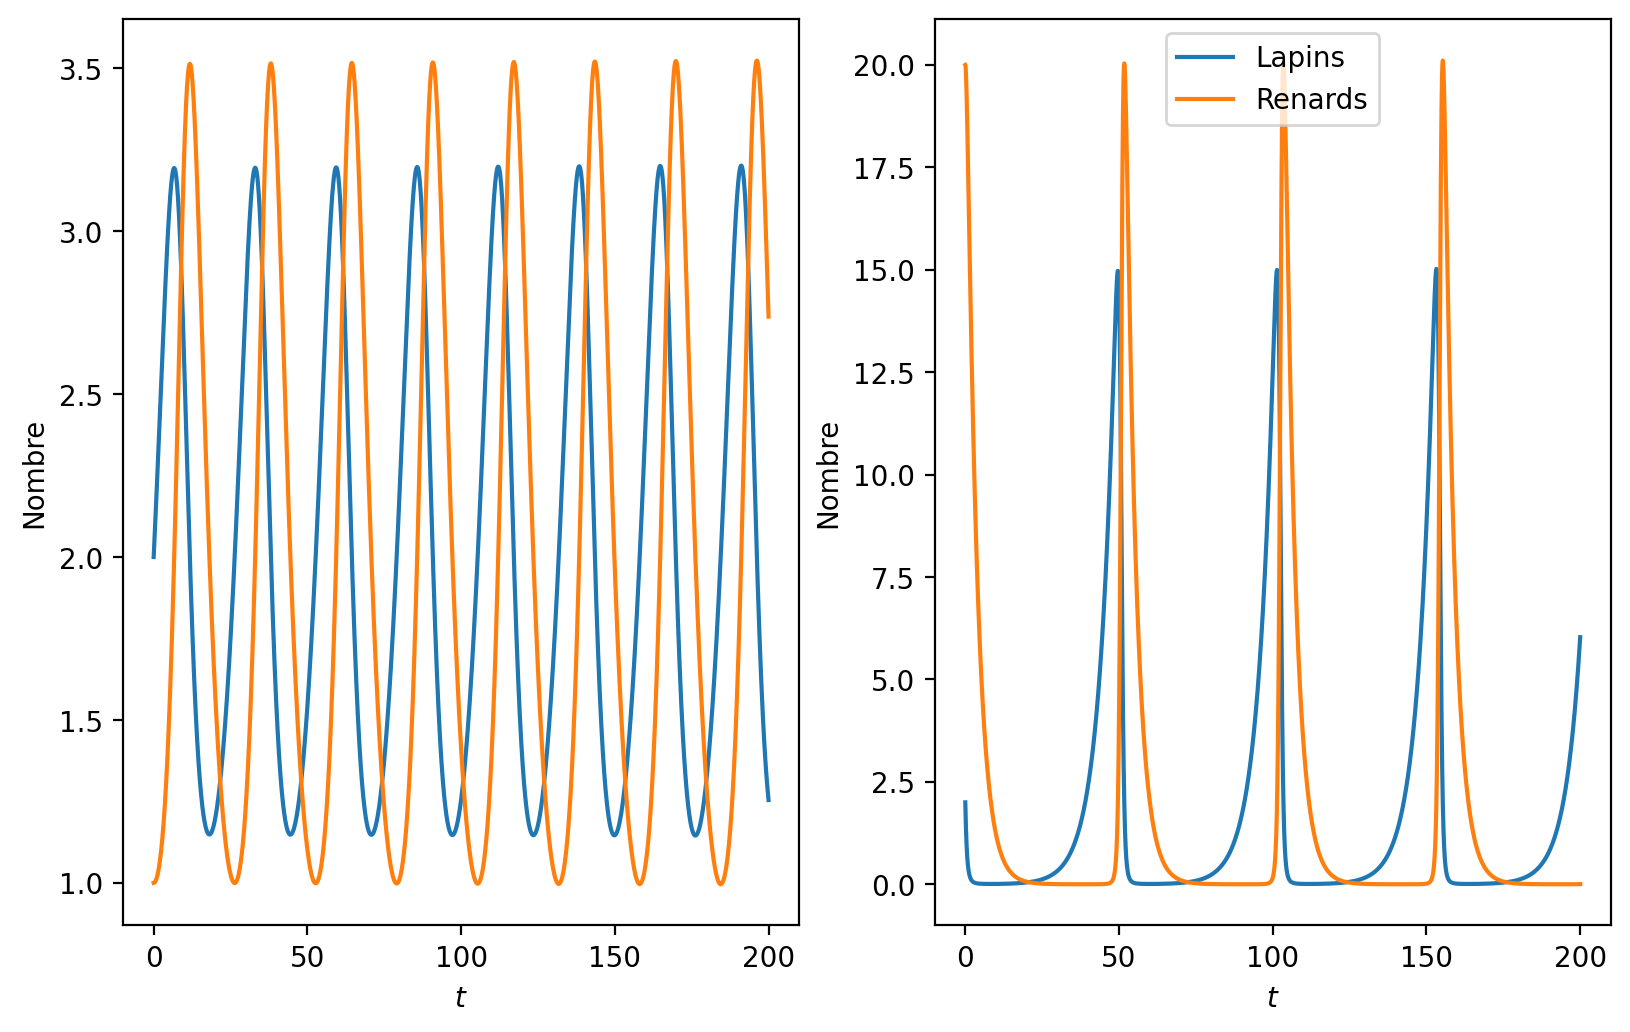

In [3]:
a, b, c, d, tf = 0.2, 0.3, 0.1, 0.15, 200
n = 200000
Li, Ri = 2, 1
T, L, R = Euler_LV(a,b,c,d,Li,Ri,tf,n)

ratio = 1.2 # ratio de taille entre fig et texte (légende et axes), par défaut 1
plt.figure(figsize=(8*ratio,5*ratio),dpi = 200)
plt.subplot(121)
plt.plot(T,L,label='Lapins')
plt.plot(T,R,label='Renards')
plt.xlabel(r'$t$')
plt.ylabel('Nombre')

plt.subplot(122)
Li, Ri = 2, 20
T, L, R = Euler_LV(a,b,c,d,Li,Ri,tf,n)
plt.plot(T,L,label='Lapins')
plt.plot(T,R,label='Renards')
plt.xlabel(r'$t$')
plt.ylabel('Nombre')

plt.legend()
plt.show()

On retrouve donc des fluctations périodiques, légerements déphasées, comme espérées... On peut aussi critiquer un peu ce modèle, dans lequel un nombre non entier d'animaux peut exister ! Plus grave, et lié au même problème : une population de lapins inférieur à 1 est possible (par exemple de 0,1), et peut ensuite donner naissances à de nombreuses naissances... Dans al réalité, si jamais $L<2$, alors la population de devrait jamais pouvoir repartir !

**Question 4 :**
Pour les deux cas précédents, réaliser un portrait de phase du système, c'est-à-dire tracer $R(t)$ en fonction de $L(t)$.

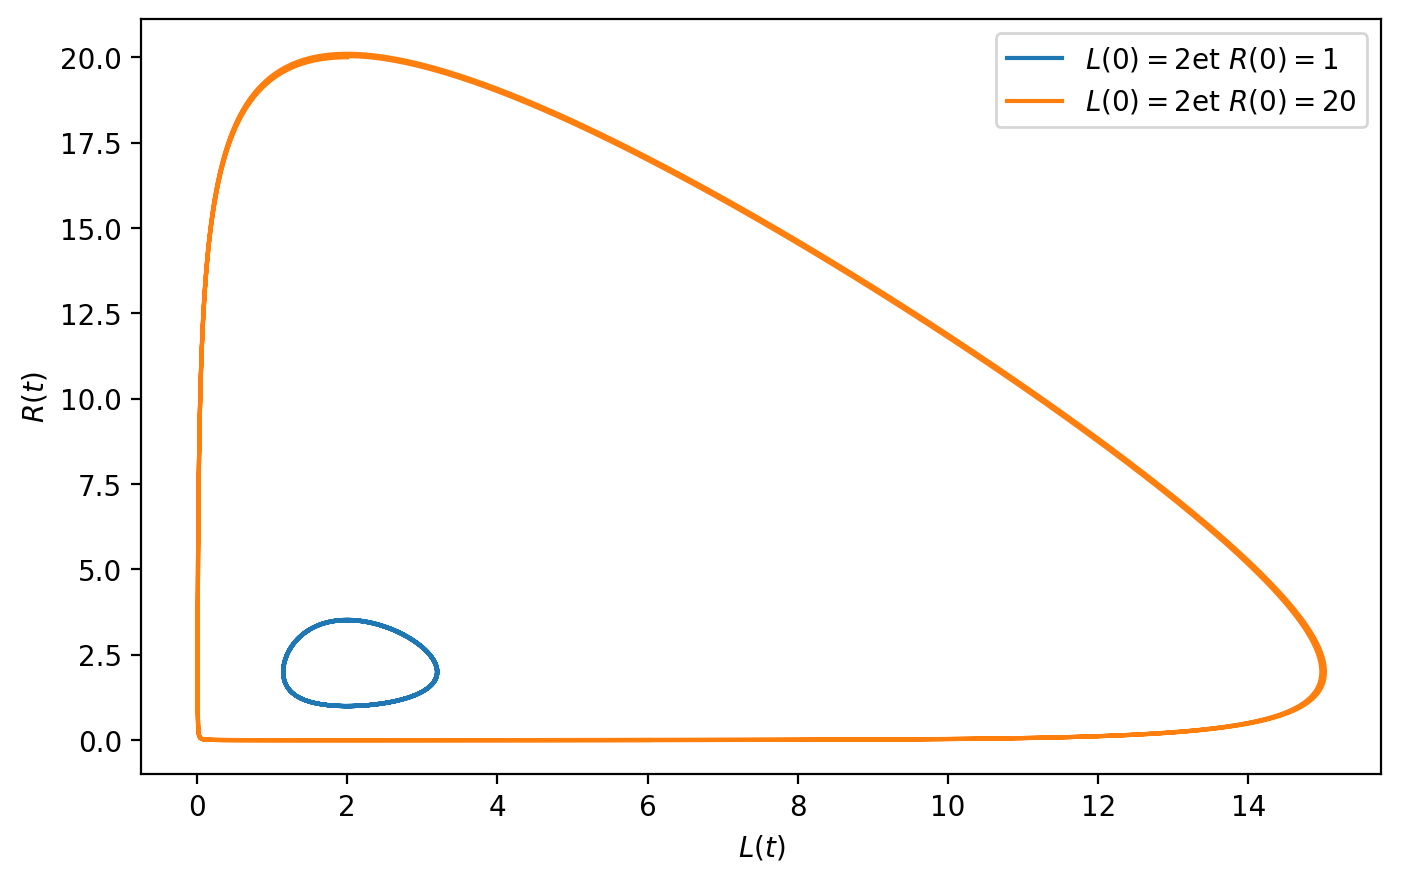

In [9]:
a, b, c, d, tf = 0.2, 0.3, 0.1, 0.15, 200
n = 200000
Li, Ri = 2, 1
T, L, R = Euler_LV(a,b,c,d,Li,Ri,tf,n)

ratio = 1 # ratio de taille entre fig et texte (légende et axes), par défaut 1
plt.figure(figsize=(8*ratio,5*ratio),dpi = 200)
plt.plot(L,R,label=r'$L(0) = 2$'+ 'et ' +'$R(0) = 1$')

Li, Ri = 2, 20
T, L, R = Euler_LV(a,b,c,d,Li,Ri,tf,n)
plt.plot(L,R,label=r'$L(0) = 2$'+ 'et ' +'$R(0) = 20$')

plt.xlabel(r'$L(t)$')
plt.ylabel(r'$R(t)$')
plt.legend()
plt.show()

### <font color='orange'> *Pour aller plus loin...* <font color='black'>
    
**Question 5 :** Donner les positions d'équilibre du système.    

*Correction :*  Deux positions d'équilibre possible :
- $R=0$ **et** $L=0$ : plus de prédateurs ni de proies...pas très intéressant !
- $R_{eq} = \frac{a}{c}$ et $L_{eq} = \frac{b}{d}$ : position intéressante !

**Question 6 :** On pose  $L=L_{eq} ( 1 +\epsilon_L (t))$ et $R=R_{eq}  ( 1 +\epsilon_R (t) )$ : ainsi on va étudier un système proies-prédateurs proche de son point déquilibre. Ré-écrire les équations différentielles au premier ordre en $\epsilon$, et en déduire la forme des oscillations autours des positions d'équilibre.

*Correction :* A l'ordre 1 en $\epsilon$, on trouve le système suivant :
$$\begin{cases}
\dot{\epsilon_L}(t) = a\epsilon_L-c.R_{eq}(\epsilon_L+\epsilon_R)\\
\dot{\epsilon_R}(t) = -b\epsilon_R + d.L_{eq}(\epsilon_L+\epsilon_R)
\end{cases}$$
Soit, en simplifiant :
$$\begin{cases}
\dot{\epsilon_L}(t) = -a\epsilon_R \\
\dot{\epsilon_R}(t) = b\epsilon_L
\end{cases}$$
On peut alors ré-écrire sous forme d'une seule équation du 2nd ordre :
$$\ddot{\epsilon_L}(t)+ab\epsilon_L =0 $$
Ou :
$$\ddot{\epsilon_R}(t)+ab\epsilon_R =0 $$
On trouve donc des équations différentielles d'oscillateurs harmoniques, de pulsation propre $\omega_0 = \sqrt{ab}$ (à la fois pour les proies et pour les prédateurs). On devrait donc obtenir des variations sinusoïdales en fonction du temps pour le nombre de proies et de prédateurs, avec la même période. Les valeurs moyennes seront celle à l'équilibre, et l'amplitude dépendra des C.I. . Ainsi on devrait observer des élipses en portrait de phase. Vérifions tout cela :

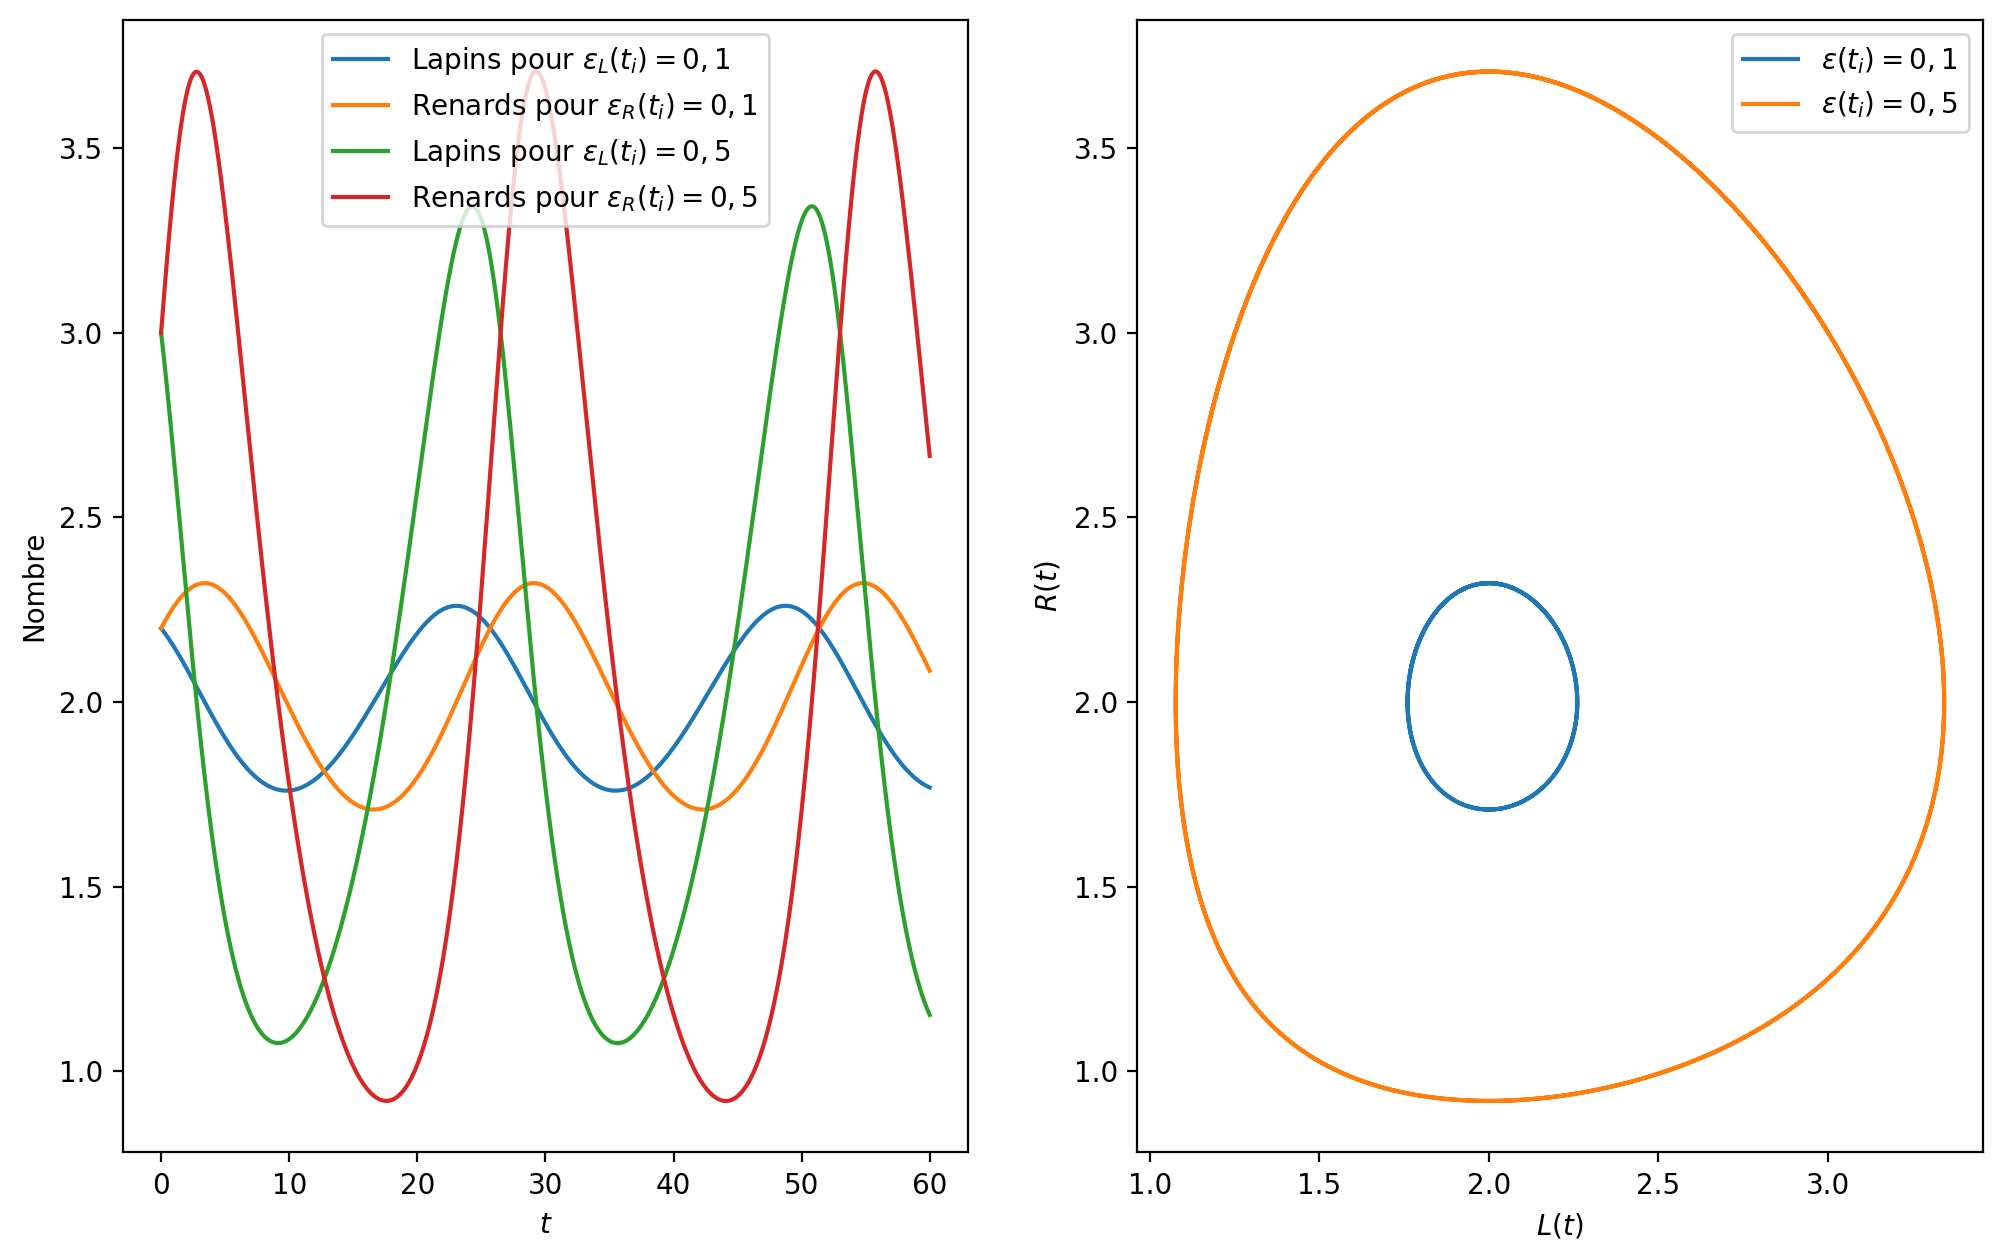

In [10]:
a, b, c, d, tf = 0.2, 0.3, 0.1, 0.15, 60
n = 200000
Leq, Req = b/d, a/c

eR, eL = 0.1, 0.1
Li, Ri = Leq*(1+eL), Req*(1+eR)
T, L, R = Euler_LV(a,b,c,d,Li,Ri,tf,n)

ratio = 1.5 # ratio de taille entre fig et texte (légende et axes), par défaut 1
plt.figure(figsize=(8*ratio,5*ratio),dpi = 200)
plt.subplot(121)
plt.plot(T,L,label=r'Lapins pour '+'$\epsilon_L(t_i)=0,1$')
plt.plot(T,R,label=r'Renards pour '+'$\epsilon_R(t_i)=0,1$')
plt.legend()

eR, eL = 0.5, 0.5
Li, Ri = Leq*(1+eL), Req*(1+eR)
T, L, R = Euler_LV(a,b,c,d,Li,Ri,tf,n)
plt.plot(T,L,label=r'Lapins pour '+'$\epsilon_L(t_i)=0,5$')
plt.plot(T,R,label=r'Renards pour '+'$\epsilon_R(t_i)=0,5$')
plt.xlabel(r'$t$')
plt.ylabel('Nombre')
plt.legend()

plt.subplot(122)
eR, eL = 0.1, 0.1
Li, Ri = Leq*(1+eL), Req*(1+eR)
T, L, R = Euler_LV(a,b,c,d,Li,Ri,tf,n)
plt.plot(L,R,label=r'$\epsilon(t_i)=0,1$')


eR, eL = 0.5, 0.5
Li, Ri = Leq*(1+eL), Req*(1+eR)
T, L, R = Euler_LV(a,b,c,d,Li,Ri,tf,n)
plt.plot(L,R,label=r'$\epsilon(t_i)=0,5$')

plt.xlabel(r'$L(t)$')
plt.ylabel(r'$R(t)$')

plt.legend()
plt.show()

##  <font color='green'> Deuxième partie :  un modèle d'épidémiologie <font color='black'>
Les modélisations épidémiologiques sont des modèles mathématiques de la propagation de maladies infectieuses. Outre l'étude de l'évolution de maladies, ils permettent de prévoir les conséquences pour la population d'actions publiques telles que la vaccination, la mise en quarantaine, l'instauration de gestes barières, des mesures de dépistages ou de confinement.
   
Dans ces modèles, on divise la population en plusieurs "compartiments" :
- le compartiment S, pour "Susceptible" -> individus sains susceptibles d'être infectés;
- le compartiment I, pour "Infectious" -> individus infectés et contagieux;
- le compartiment R, pour "Recovered" -> individus guéris et immunisés.

Dans un premier temps, on ne considère que les compartiments S et I (ce qui est valable pour certaines infections comme le rhume contre lequel on ne développe pas d'immunité) : il s'agit d'un modèle SIS. On considère une population constante (pas de naissances et maladie "gentille" qui ne tue pas !) normalisée à 1. On a donc $S(t)+I(t) = 1\  ∀ t$.

Voici le système d'équations différentielles  :
$$\begin{cases}
\dot{S}(t) = - \alpha . S(t).I(t)+ \delta .I(t)\\
\dot{I}(t) = \beta .S(t).I(t) - \gamma.I(t)
\end{cases}$$

**Question 1 :** Montrer que $γ = \delta$ et $α = β $. Simplifier alors le système d'équations, et donner la signification de $\beta$ et $\gamma$ (on pourra s'interesser aux différences avec le modèle de proies-prédateurs).

*Correction :* On a $S(t)+I(t) = 1\  ∀ t$, donc $\dot{S}(t)+\dot{I}(t) = 0\ ∀ t$. En sommant les équations différentielles, on trouve donc les relations demandées.

Le système s'écrit alors :
$$\begin{cases}
\dot{S}(t) = - \beta . S(t).I(t)+ \gamma .I(t)\\
\dot{I}(t) =  β .S(t).I(t) - γ .I(t)
\end{cases}$$
En prenant $S(t)=0$, on trouve $\dot{I}(t) =  - γ .I(t)$ : naturellement, les personnes infectées guérissent, avec un taux $\gamma$.  Ce terme se retrouve dans l'autre équation, mais positif, car ce phénomène augmente la part de la population saine.

En prenant $I(t)=0$, on trouve $\dot{S}(t) = 0$ : sans malades, des personnes saines de ne peuvent être infectées.

Dans l'équation $\dot{S}(t) = - \beta . S(t).I(t)+ \gamma .I(t)$, le terme $- \beta . S(t).I(t)$ représente les personnes qui tombent malades (deviennent infectées) suite au contact de personnes déjà infectées. C'est pourquoi il s'agit d'un terme proportionel à $I(t)$, nombre de personnes infectées. Ce terme se retrouve dans l'autre équation, mais positif, car les personnes saines qui deviennent malades font diminuer la part de la population saine, mais font augmenter (dans les mêmes proportions) la part de celle infectée.

**Question 2 :** On considère un premier modèle de maladie fictive, la maladie X. Ecrire la fonction `Euler_SIS(beta,gamma,Ii,Si,tf,n)` qui retourne la liste des temps `T` et les listes `I` et `S` de l'évolution des compartiments au cours du temps.

In [11]:
def Euler_SIS(beta,gamma,Ii,Si,tf,n):
    T=[0]
    I=[Ii]
    S=[Si]
    h = tf / (n-1)
    for i in range(n-1):
        T.append(T[-1]+h)
        S.append(S[-1]-beta*h*S[-1]*I[-1]+gamma*h*I[-1])
        I.append((1-h*gamma)*I[-1]+beta*h*S[-2]*I[-1])
    return T,S,I

**Question 2 :** On prendra comme valeurs numériques $γ = 0.01\ jour^{-1}$ et $β = 0.03\ jour^{-1}$, et une durée $t_f = 500\ jours$. Tracer l'évolution de la population des infectés pour les conditions initiales suivantes :
- 100% de malades initialement,
- 80% de malades initalement,
- 50% de malades initalement,
- et enfin 1%  de malades initalement.

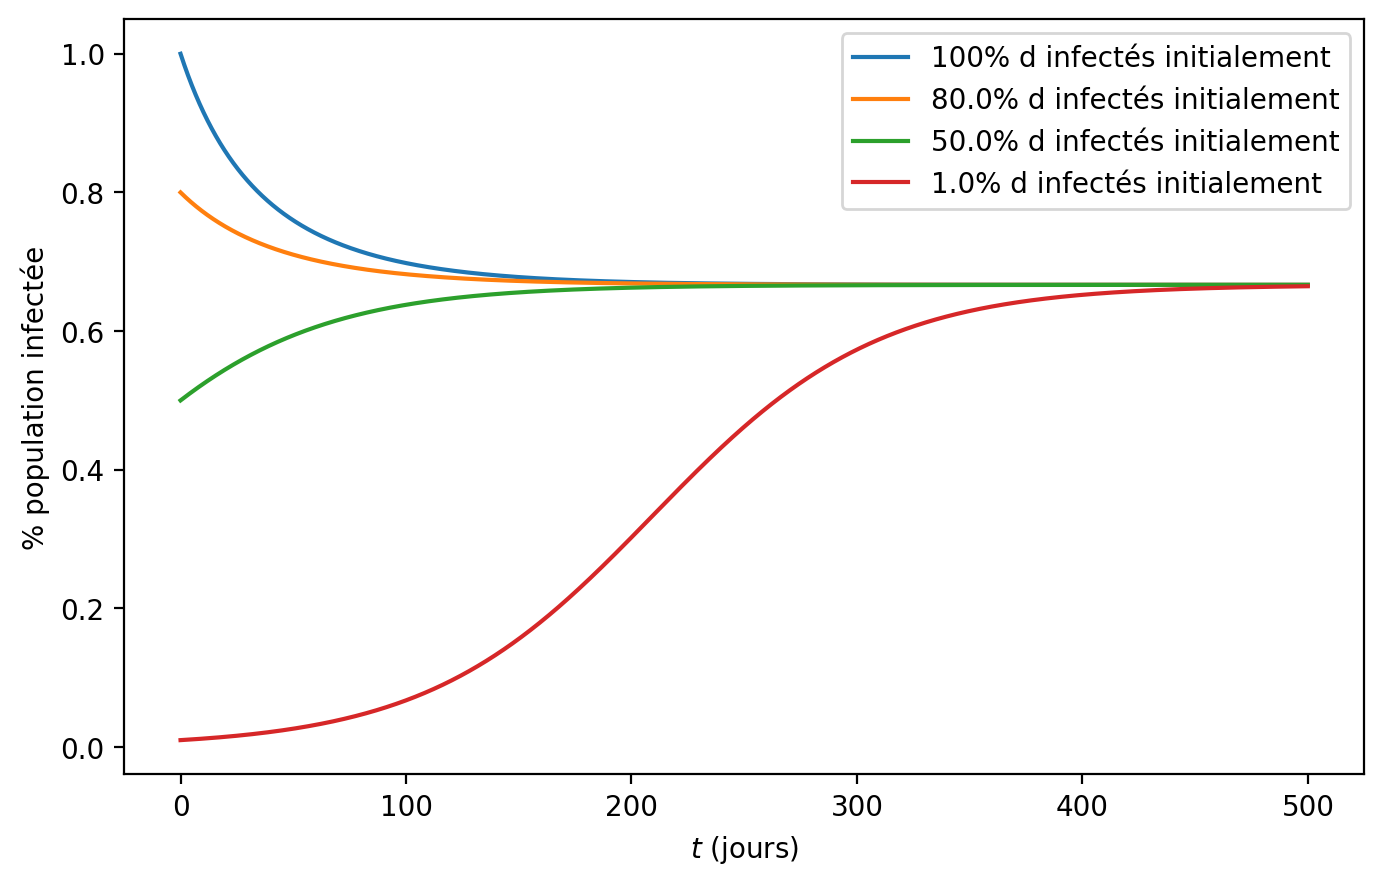

In [12]:
beta, gamma = 0.03, 0.01
tf = 500
n = 10000

ratio = 1 # ratio de taille entre fig et texte (légende et axes), par défaut 1
plt.figure(figsize=(8*ratio,5*ratio),dpi = 200)

for Ii in [1,0.8,0.5,0.01]:
    Si=1-Ii
    T, S, I = Euler_SIS(beta,gamma,Ii,Si,tf,n)
    plt.plot(T,I,label=str(Ii*100)+'% d infectés initialement')

plt.xlabel(r'$t$ (jours)')
plt.ylabel('% population infectée')
plt.legend()
plt.show()

**Question 3 :** Que peut-on en déduire ? Montrer alors cettre propriété.

*Correction :* Indépendemment des C.I., le système semble toujours converger vers le même état final, déterminé par les valeurs de $\beta$ et $\gamma$. En effet, on peut trouver cet état d'équilibre du système avec $\dot{S}(t)=\dot{I}(t)=0$ : on a alors $S_f=S(t \to \infty)= \frac{\gamma}{\beta}$ et $I_f=I(t \to \infty)= 1 - \frac{\gamma}{\beta}$. On remarque donc que si $γ > \beta$, la maladie disparait définitivement.

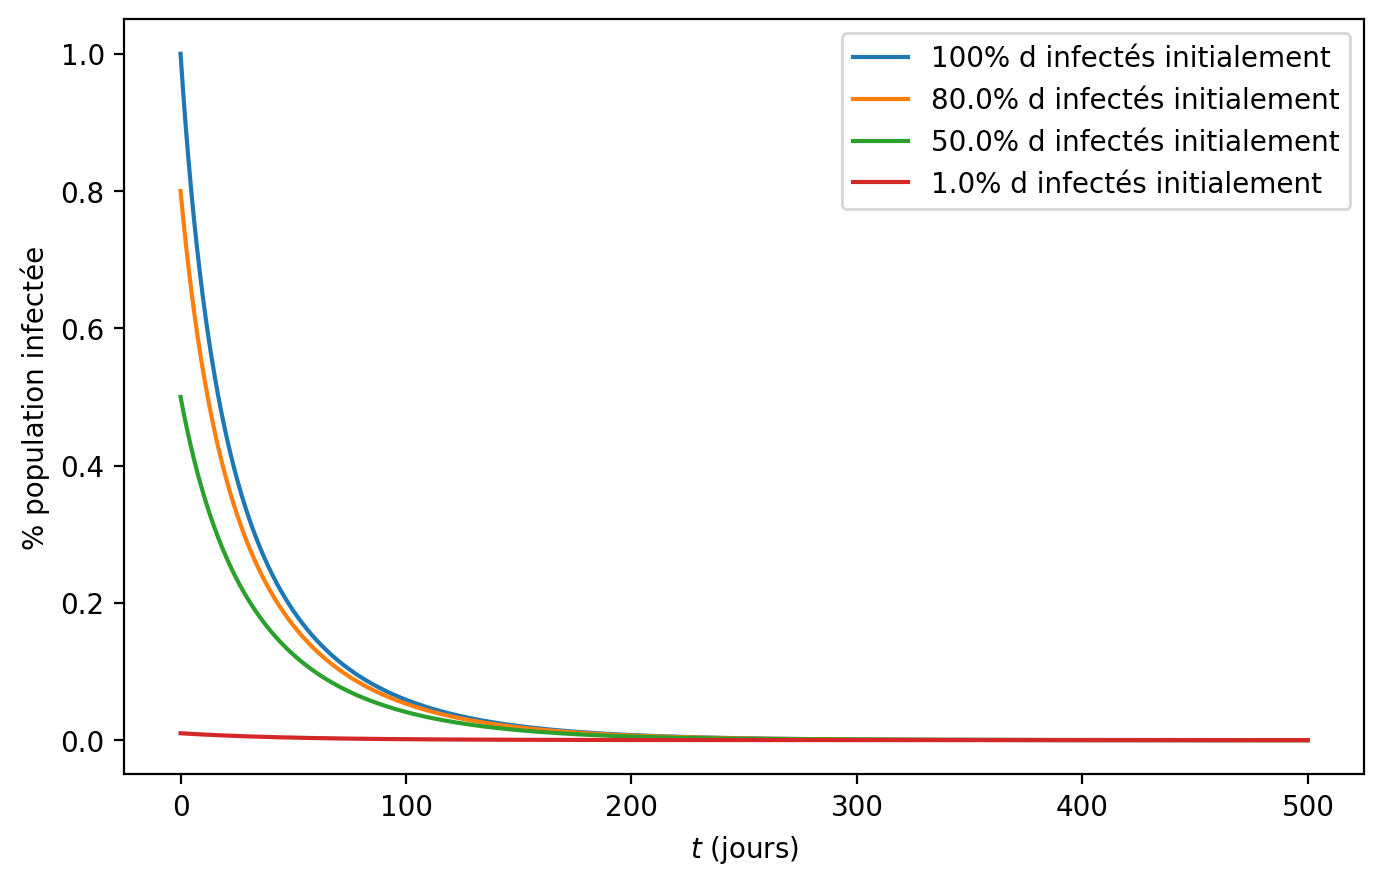

In [13]:
beta, gamma = 0.03, 0.05
tf = 500
n = 10000

ratio = 1 # ratio de taille entre fig et texte (légende et axes), par défaut 1
plt.figure(figsize=(8*ratio,5*ratio),dpi = 200)

for Ii in [1,0.8,0.5,0.01]:
    Si=1-Ii
    T, S, I = Euler_SIS(beta,gamma,Ii,Si,tf,n)
    plt.plot(T,I,label=str(Ii*100)+'% d infectés initialement')


plt.xlabel(r'$t$ (jours)')
plt.ylabel('% population infectée')
plt.legend()
plt.show()

Revenons au modèle complet, dans lequel on peut guérir ! On introduit donc le compartiment R, qui va contenir les personnes soit guéries et donc imunisées, soit mortes (pour *Recovered* ou *Removed*). Voici les équations différentielles modélisant l'évolution de la maladie :

$$\begin{cases}
\dot{S}(t) = - \beta . S(t).I(t)\\
\dot{I}(t) = \beta .S(t).I(t) - \gamma.I(t)\\
\dot{R}(t) = + \gamma .I(t)
\end{cases}$$

**Question 4 :** Ecrire la fonction `Euler_SIR(beta,gamma,Ii,Si,tf,n)` qui retourne la liste des temps `T` et les listes `I`, `S` et `R` de l'évolution des compartiments au cours du temps. Comparer ensuite les deux dernière épidémies.

In [14]:
def Euler_SIR(beta,gamma,Ii,Si,tf,n):
    T=[0]
    I=[Ii]
    S=[Si]
    R=[0]
    h = tf / (n-1)
    for i in range(n-1):
        T.append(T[-1]+h)
        S.append(S[-1]-beta*h*S[-1]*I[-1])
        I.append((1-h*gamma)*I[-1]+beta*h*S[-2]*I[-1])
        R.append(R[-1]+gamma*h*I[-1])
    return T,S,I,R

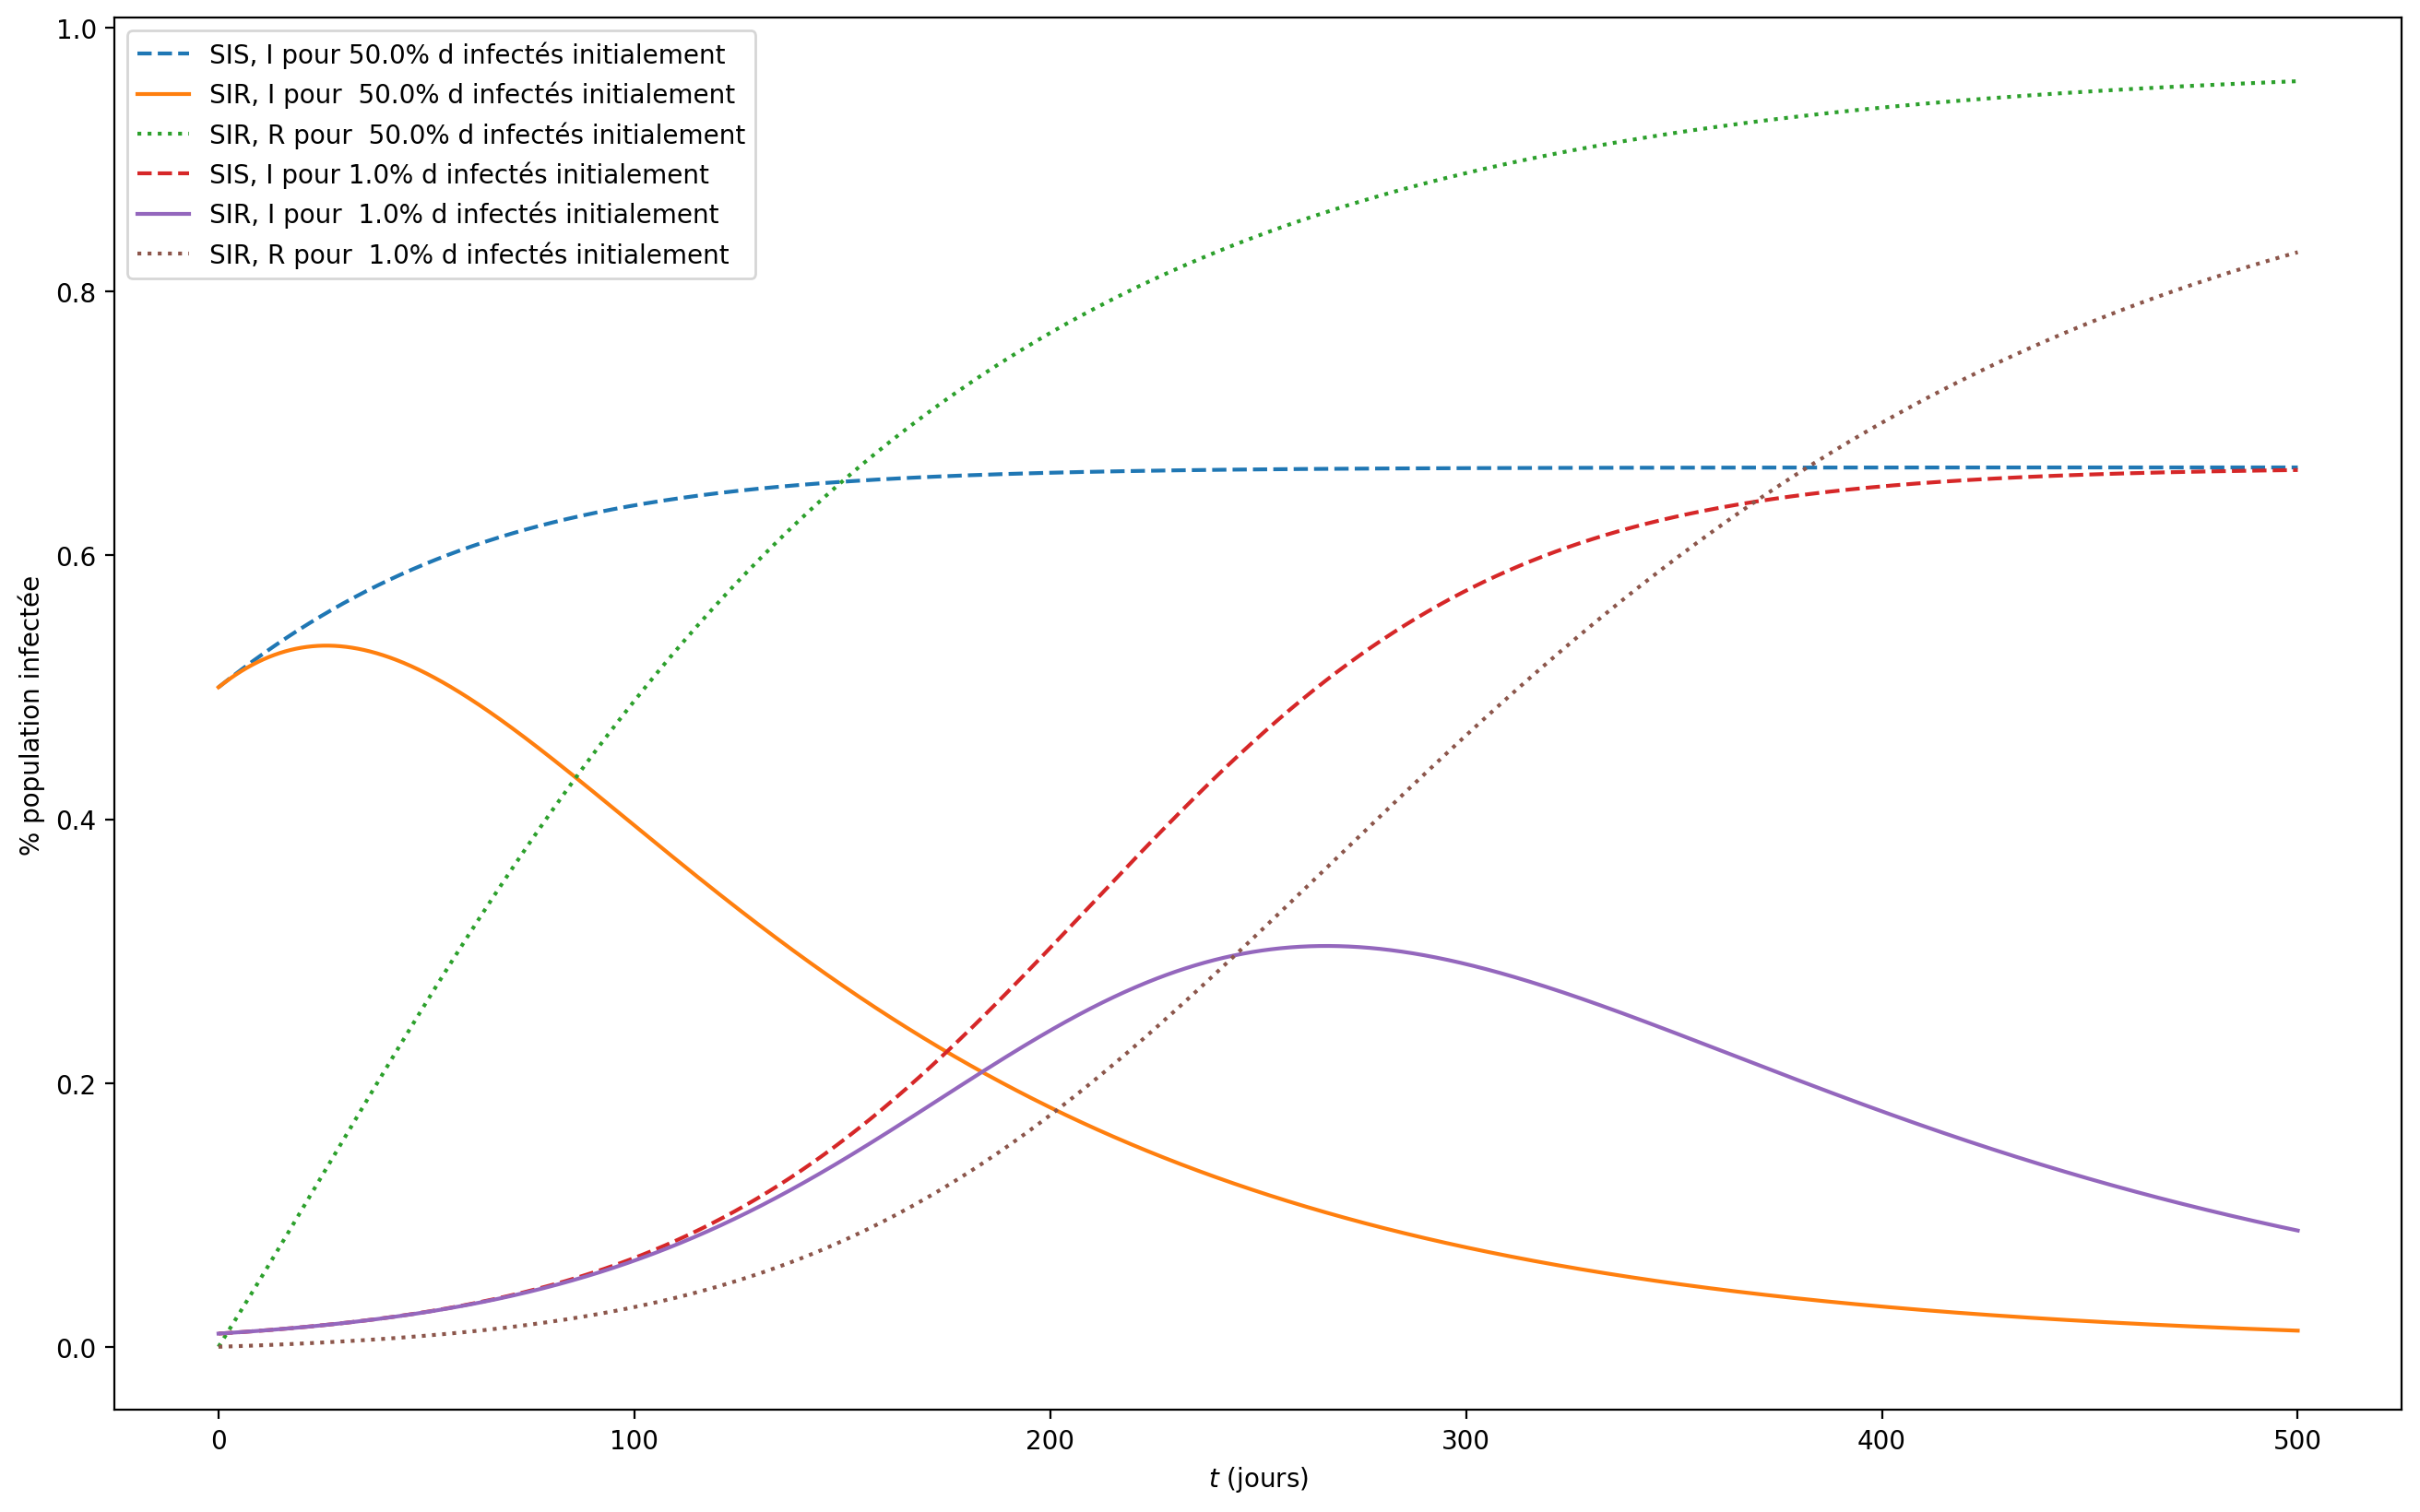

In [28]:
beta, gamma = 0.03, 0.01
tf = 500
n = 10000

ratio = 2 # ratio de taille entre fig et texte (légende et axes), par défaut 1
plt.figure(figsize=(8*ratio,5*ratio),dpi = 200)

for Ii in [0.5,0.01]:
    Si=1-Ii
    T, S1, I1 = Euler_SIS(beta,gamma,Ii,Si,tf,n)
    T, S2, I2, R2 = Euler_SIR(beta,gamma,Ii,Si,tf,n)
    plt.plot(T,I1,linestyle='--',label='SIS, I pour ' +str(Ii*100)+'% d infectés initialement')
    plt.plot(T,I2,label='SIR, I pour  ' +str(Ii*100)+'% d infectés initialement')
    plt.plot(T,R2,linestyle=':',label='SIR, R pour  ' +str(Ii*100)+'% d infectés initialement')

plt.xlabel(r'$t$ (jours)')
plt.ylabel('% population infectée')
plt.legend()
plt.show()

##  <font color='green'> DM :  Modélisation de l'épidémie du COVID <font color='black'>
    
Pour modéliser la pandémie du COVID, les équations proposées sont :
    
$$\begin{cases}
\dot{S}(t) = - \beta  S(t).(I(t)+\epsilon Q(t))\\
\dot{I}(t) = \beta  S(t).(I(t)+\epsilon Q(t)) - \left (\frac{1}{\tau_m}+\frac{1}{\tau_d} \right )I(t)\\
\dot{R}(t) =  \frac{\omega}{\tau_m} (I(t)+Q(t))\\
\dot{D}(t) =  \frac{1 - \omega}{\tau_m} (I(t)+Q(t))\\
\dot{Q}(t) = \frac{1}{\tau_d} I(t)- \frac{1}{\tau_m}Q(t) 
\end{cases}$$    
    
D représente la catégorie des personnes mortes (R ne concerne plus que les personnes guéries...), et Q celles en quarantaine.
    
**Question 1 :** Interpréter les termes des équations.    

On propose le code suivant, pour résoudre numériquement (par la méthode d'Euler) les éuations précédentes :

In [286]:
def Euler_Covid(beta,eps,om,tau_d,tau_m,Ii,tf,n):
    T=[0]
    I=[Ii]
    S=[1-Ii]
    Q=[0]
    R=[0]
    D=[0]
    T_D=[0]
    DpD=[0]
    dph=0
    h = tf / (n-1)
    
    for i in range(n-1):
        T.append(i*h)
        S.append(S[i]-beta*h*S[i]*(I[i]+eps*Q[i]))
        Q.append((1-h/tau_m)*Q[i]+h*I[i]/tau_d)
        I.append((1-h/tau_m)*I[i]+beta*h*S[i]*(I[i]+eps*Q[i])-h*I[i]/tau_d)        
        R.append(R[i]+h*om*(I[i]+Q[i])/tau_m)
        dph+=h*(1-om)*(I[i]+Q[i])/tau_m # compteur du nombre de morts à chaque pas
        D.append(D[i]+dph)
        if T[i]%1<h : #si le jour est fini
            T_D.append(T[i])
            DpD.append(dph)
            dph = 0

    return T,T_D,S,R,D,DpD,Q,I

def plot_Covid(beta,eps,tau_d,Ii):
    # beta=0.5  contagiosité (personne infectieuse libre)
    # eps = 0.1 # coeff multiplicatif d'infectiosité pour personne en quarantaine

    tau_m = 10 # temps caractéristique en jours d'évolution de la maladie (vers la guérison ou la mort)
    om = 0.995 # rapport des chances de survie sur mort

    # tau_d = 10E10 # temps caractéristique du délai (en jours) de détection puis mise en quarantaine

    tf = 130 # durée, en jours, de la simulation
    n = 100000 # nombre de discrétisation
    # Ii = 0.0001 # fraction de la population initialement infectée

    ratio = 1 # ratio de taille entre fig et texte (légende et axes), par défaut 1
    fig, ax1 = plt.subplots(figsize=(8*ratio,5*ratio),dpi = 200)

    ax1.set_xlabel('jours')
    ax1.set_ylabel('% population')

    T,T_D,S,R,D,DpD,Q,I = Euler_Covid(beta,eps,om,tau_d,tau_m,Ii,tf,n)
    ax1.plot(T,np.multiply(100,I),label='Infectés')
    #ax1.plot(T,np.multiply(100,S),label='Sains')
    ax1.plot(T,np.multiply(100,R),label='Guéri')
    plt.legend()

    ax2 = ax1.twinx() 
    ax2.set_ylabel('Morts par jour',color='m') 
    ax2.plot(T_D,np.multiply(68E6,DpD),'m-',label='Morts/jour à échelle Fr')

    fig.tight_layout() 
    plt.show()
    

**Question 2 :** Pour chacune des simulations suivantes, expliquer le choix des paramètres, et interpréter les courbes obtenues.

Commençons par le cas simple, sans quarantaine/isolement des personnes malades, avec une population initialement inféctée très faible : c'est la phase de d'infection "invisible", le virus circule mais reste non détecté.

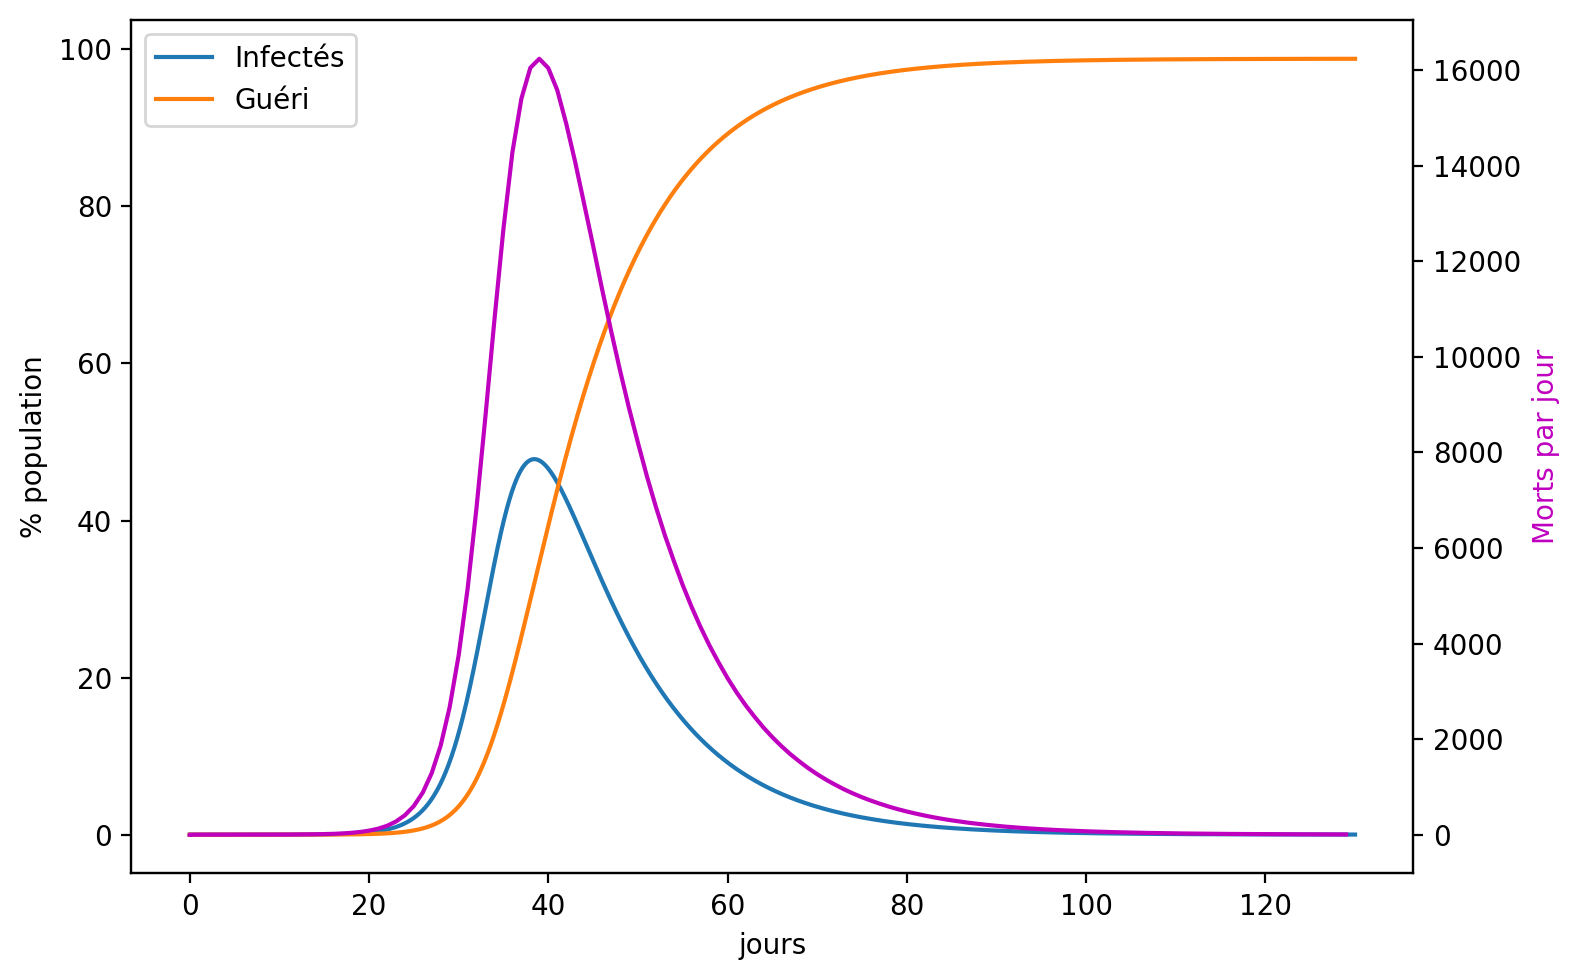

In [288]:
beta=0.5  # contagiosité (personne infectieuse libre)

eps = 0.1 # coeff multiplicatif d'infectiosité pour personne en quarantaine
tau_d = 10E10 # temps caractéristique du délai (en jours) de détection puis mise en quarantaine

Ii = 0.000001 # fraction de la population initialement infectée

plot_Covid(beta,eps,alpha,tau_d,Ii)

Malheureusement, après une phase de circulation discrete du virus ("à bas bruit"), la situation dégénère, le nombre de morts augmente très rapidement après un mois. Cela permet de donner une valeur cohérente à beta, coefficient de contagiosité. On a pris ici 'beta = 0.5', ce qui semble correspondre à une situation non contrôlée.

Une fois la maladie "découverte", on avertit la population, et on conseil l'application des gestes barrières : le coefficient beta de contagiosité diminue, prenons 0.3 :

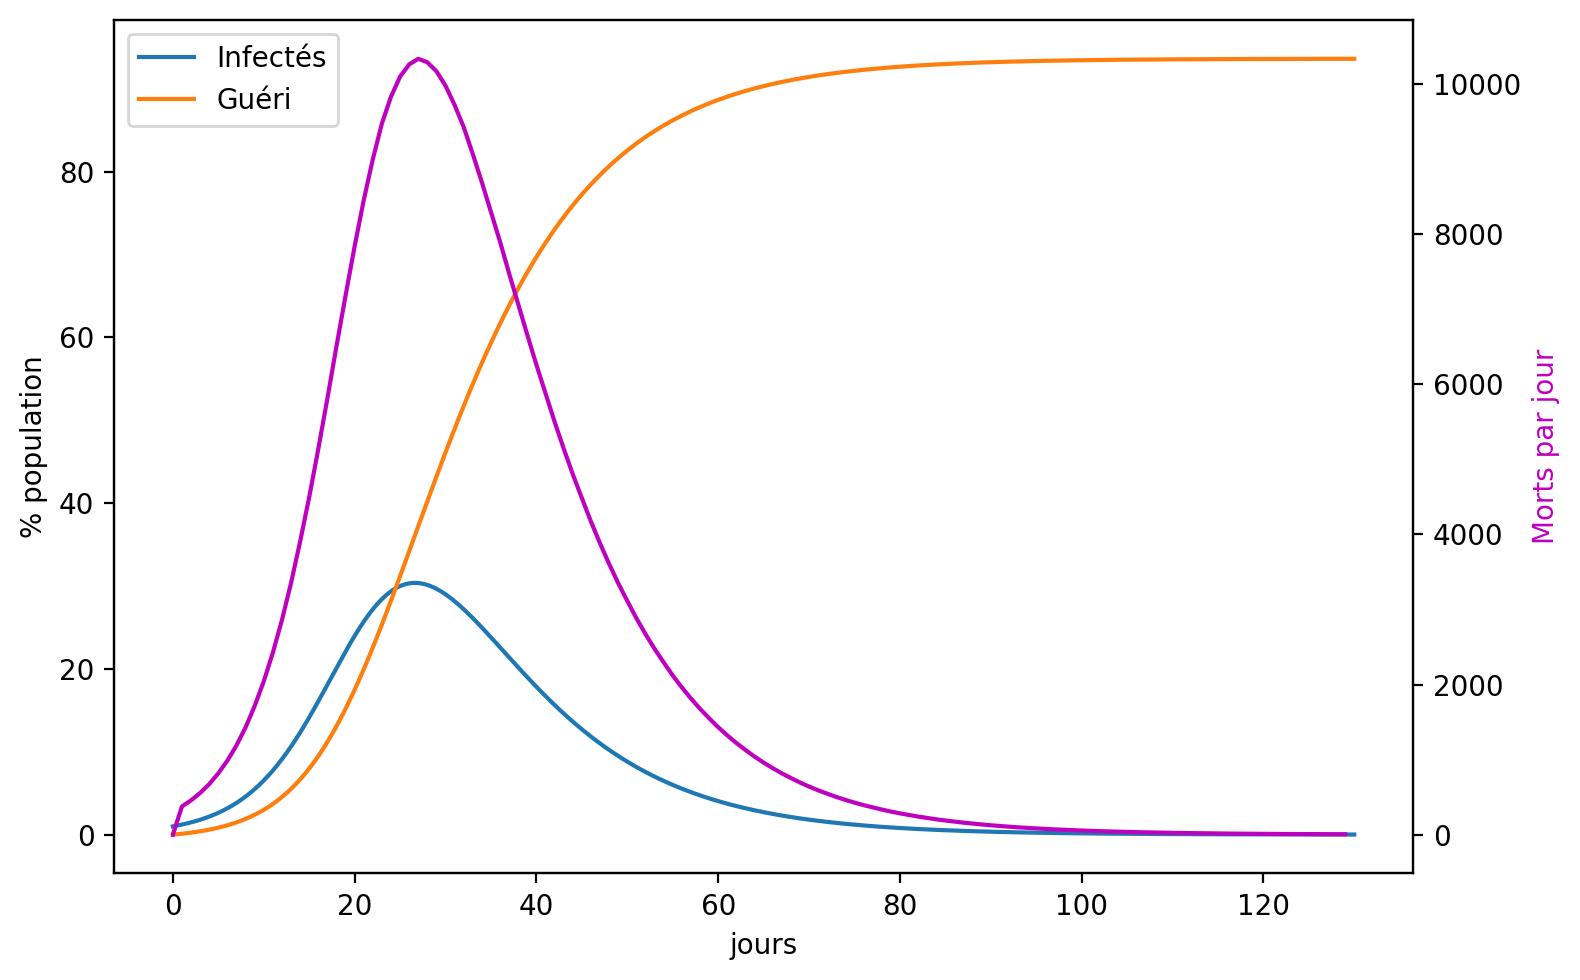

In [289]:
beta=0.3  # contagiosité (personne infectieuse libre)

eps = 0.1 # coeff multiplicatif d'infectiosité pour personne en quarantaine
tau_d = 10E10 # temps caractéristique du délai (en jours) de détection puis mise en quarantaine

Ii = 0.01 # fraction de la population initialement infectée

plot_Covid(beta,eps,alpha,tau_d,Ii)

L'épidémie fait moins de dégats, mais n'est toujours pas contrôlée...Si l'application des gestes barrières n'est pas suffisante, on confine la population : le coefficient beta de contagiosité diminue encore, prenons 0.135 :

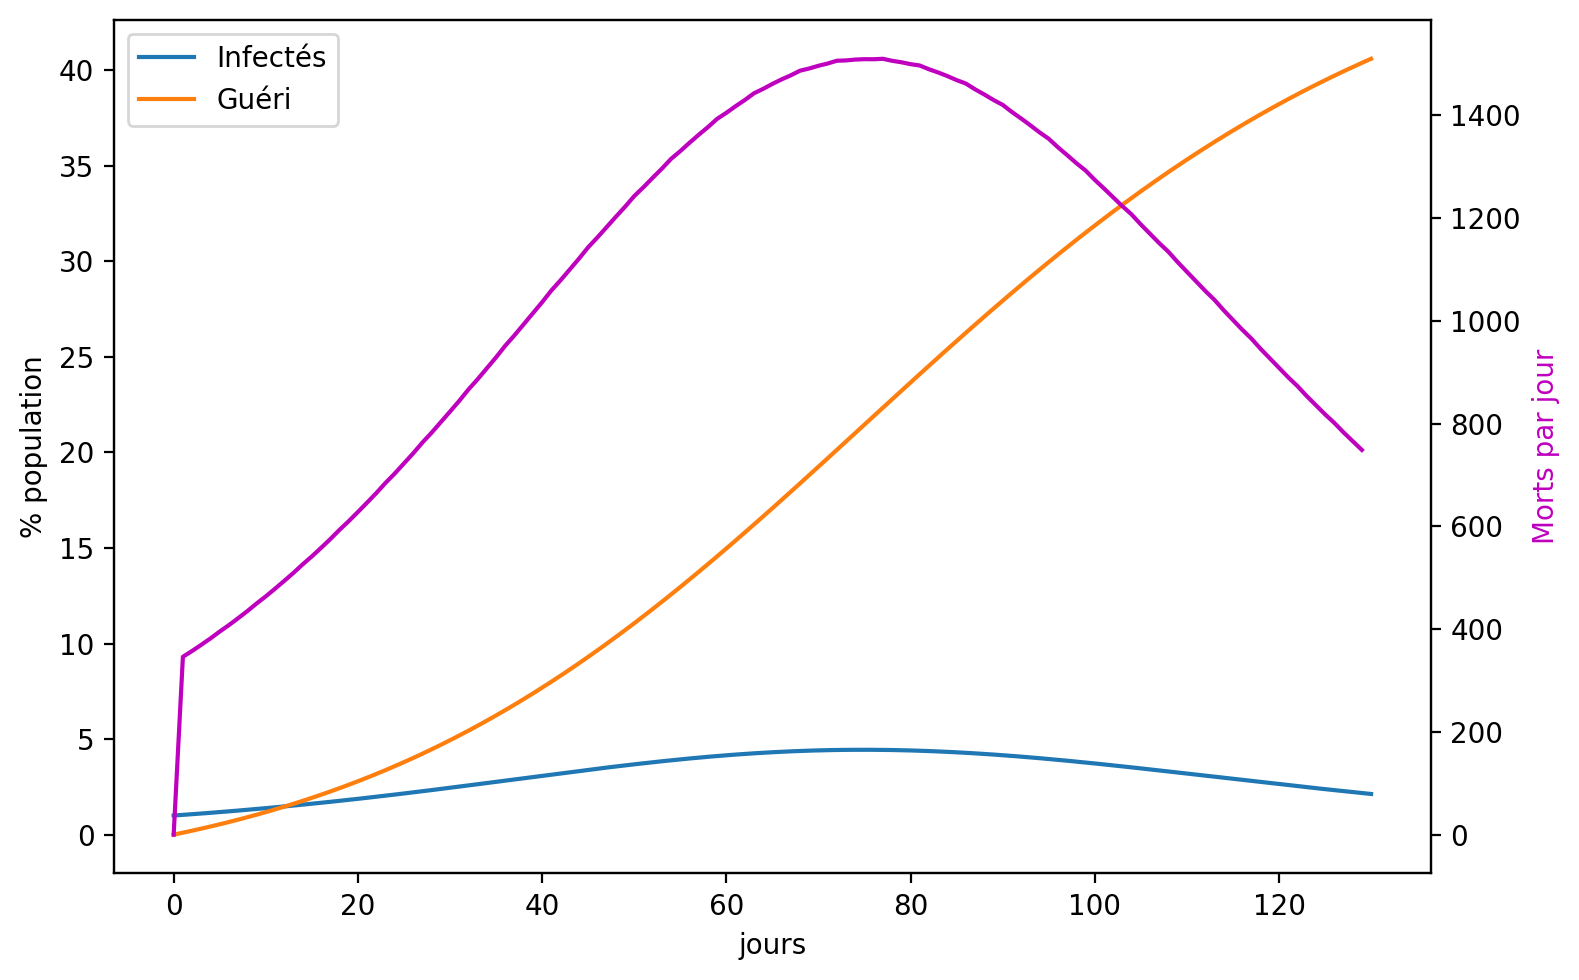

In [290]:
beta=0.135  # contagiosité (personne infectieuse libre)

eps = 0.1 # coeff multiplicatif d'infectiosité pour personne en quarantaine
tau_d = 10E10 # temps caractéristique du délai (en jours) de détection puis mise en quarantaine

Ii = 0.01 # fraction de la population initialement infectée

plot_Covid(beta,eps,alpha,tau_d,Ii)

Le nombre de morts journalier à encore largement diminué, grâce à ces mesures drastiques. Interessons-nous désormais à l'autre stratégie de "détection-traçage-isolement". Pour cela, on considère un groupe de personnes mises en quarantaine, après avoir été testées. Le reste de la population n'est pas isolée, mais respecte les gestes barrières. Commençons avec des conditions idéales : en moyenne les personnes testées ont le résultat en 1 jour.

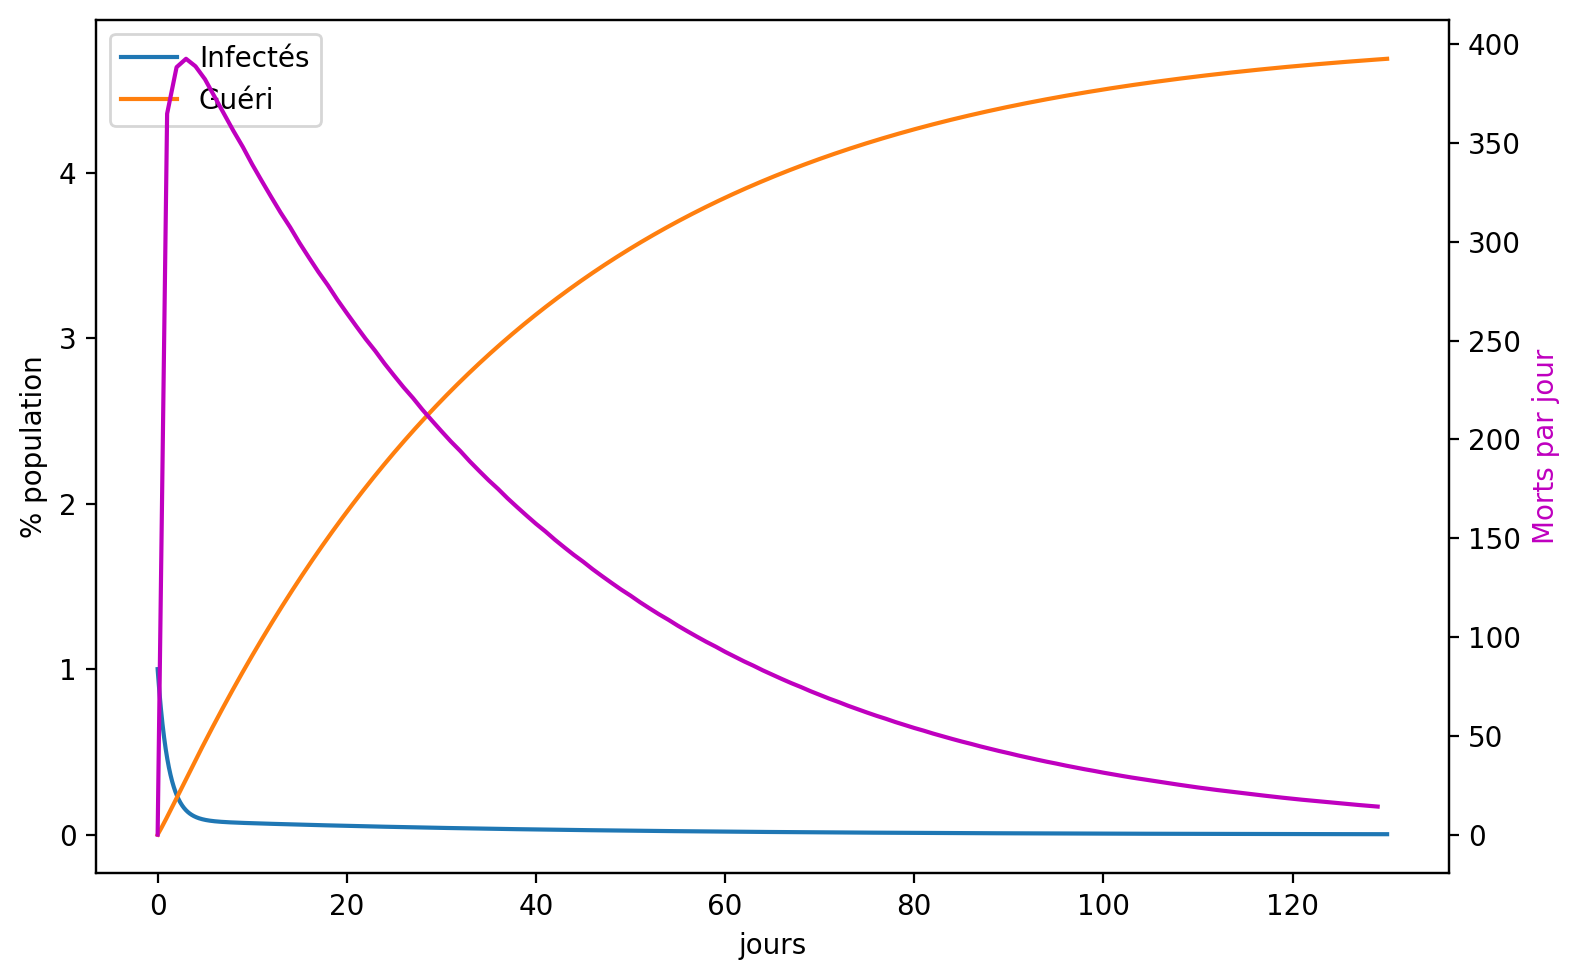

In [296]:
beta=0.3  # contagiosité (personne infectieuse libre)

eps = 0.2 # coeff multiplicatif d'infectiosité pour personne en quarantaine
tau_d = 1 # temps caractéristique du délai (en jours) de détection puis mise en quarantaine

Ii = 0.01 # fraction de la population initialement infectée

plot_Covid(beta,eps,alpha,tau_d,Ii)

C'est très efficace ! Cependant, lorsque les tests prennent plus de temps :

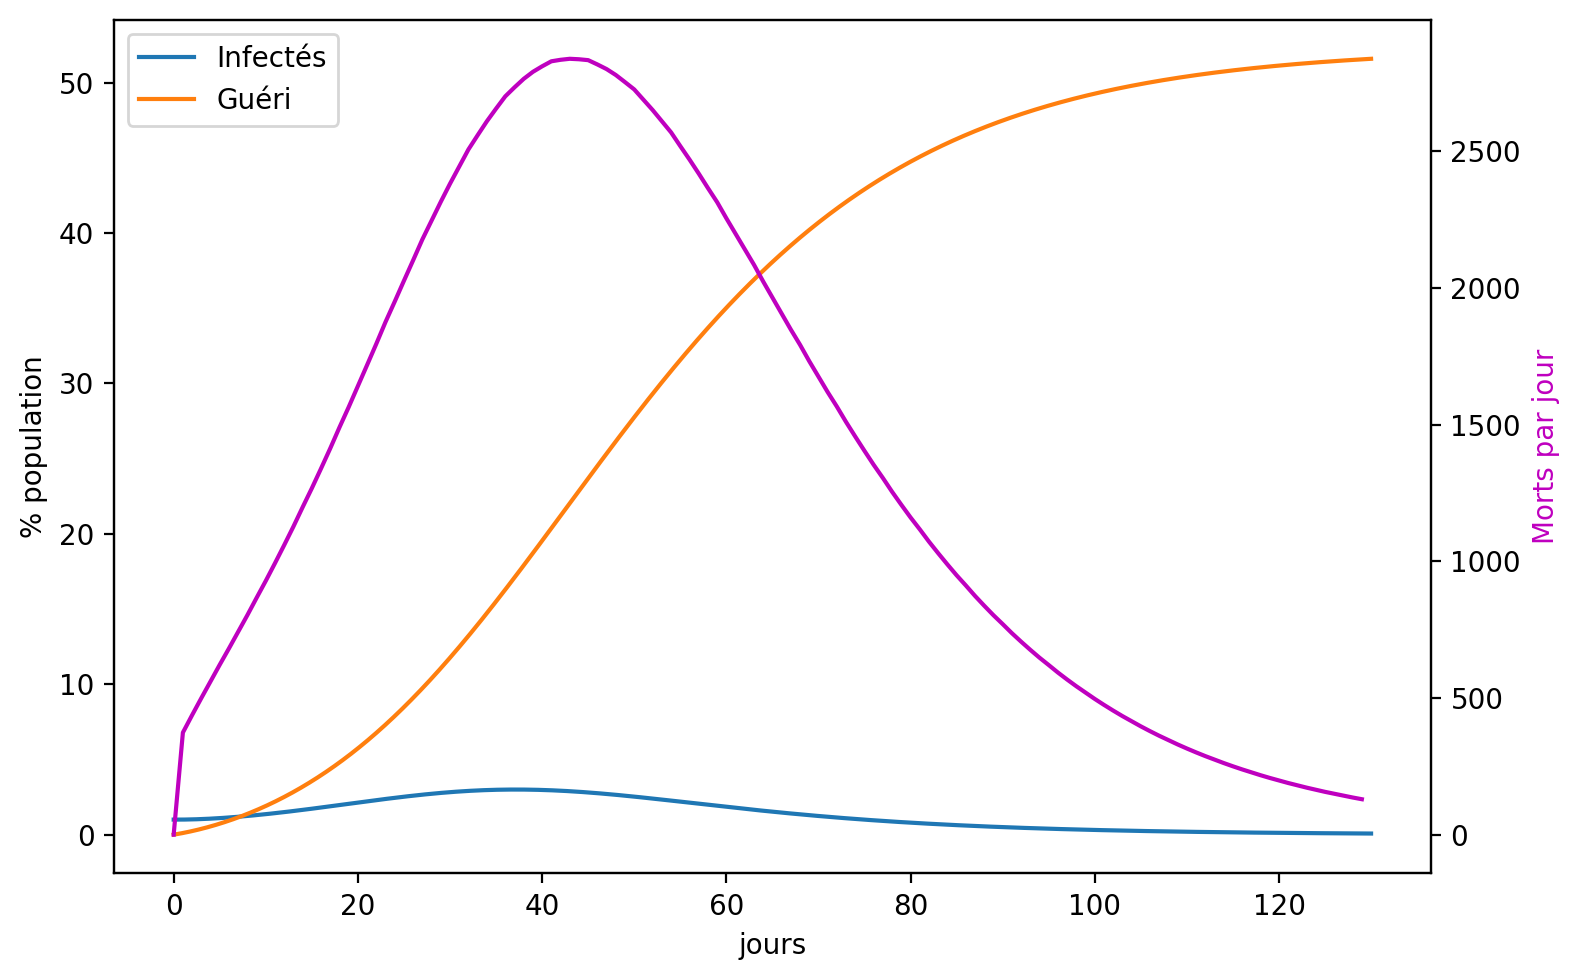

In [297]:
beta=0.3  # contagiosité (personne infectieuse libre)

eps = 0.2 # coeff multiplicatif d'infectiosité pour personne en quarantaine
tau_d = 5 # temps caractéristique du délai (en jours) de détection puis mise en quarantaine

Ii = 0.01 # fraction de la population initialement infectée

plot_Covid(beta,eps,alpha,tau_d,Ii)

L'effet est beacoup moins interessant... Combinons maitenant cela avec un confinement intermédiaire, moins strict, comme la pour 2eme vague française :

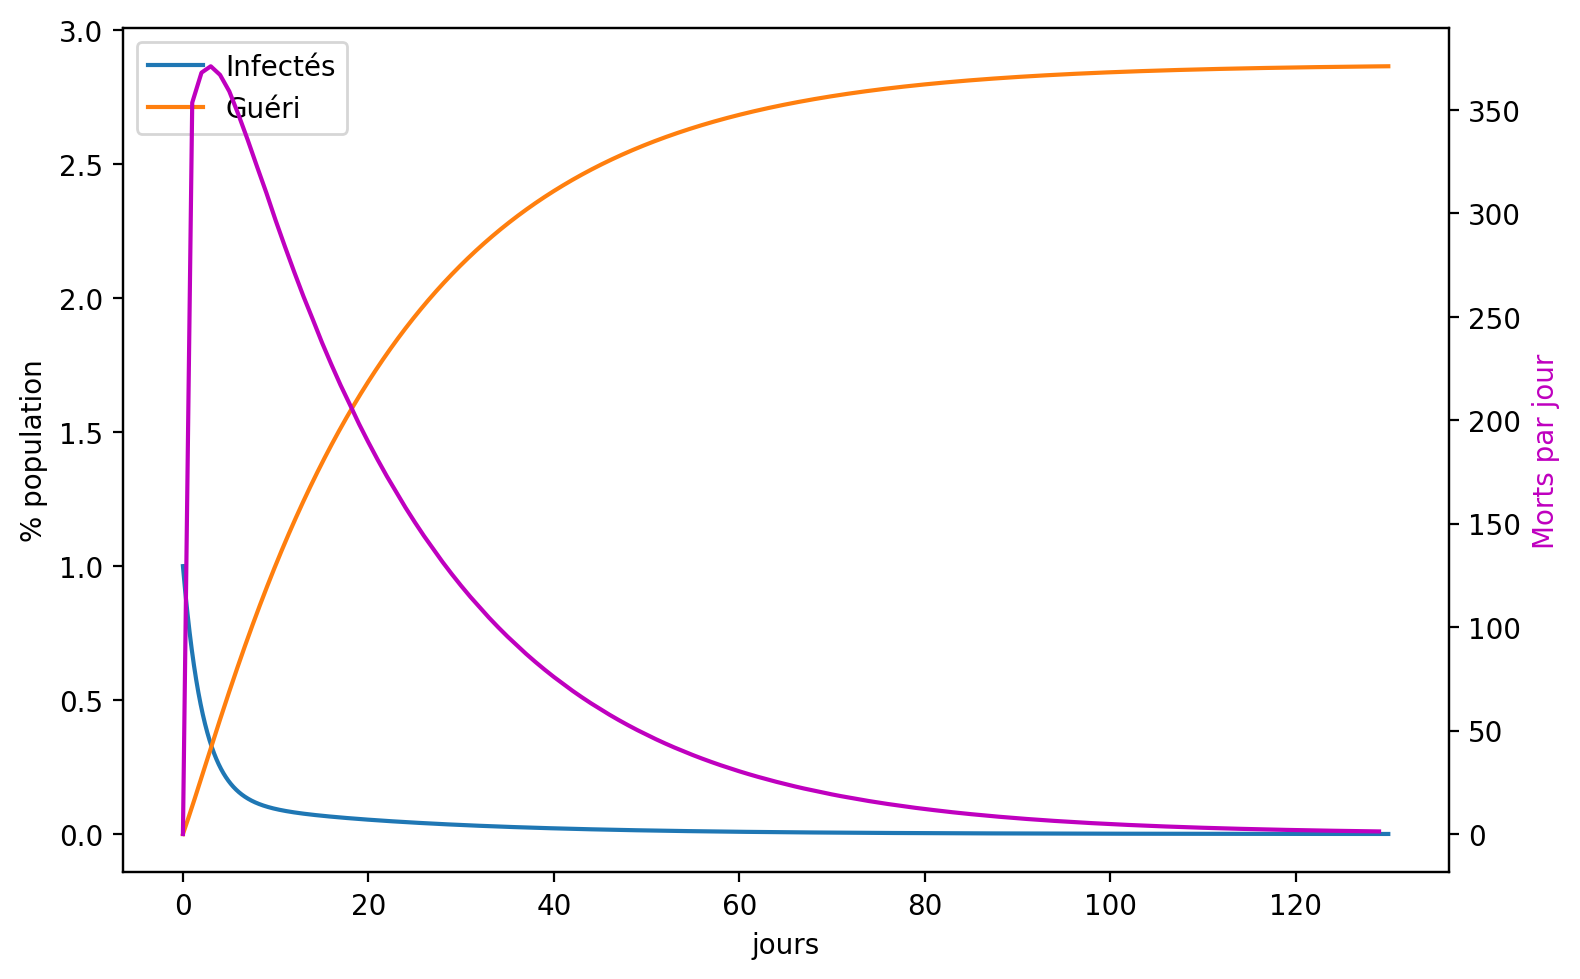

In [298]:
beta=0.2  # contagiosité (personne infectieuse libre)

eps = 0.2 # coeff multiplicatif d'infectiosité pour personne en quarantaine
tau_d = 2 # temps caractéristique du délai (en jours) de détection puis mise en quarantaine

Ii = 0.01 # fraction de la population initialement infectée

plot_Covid(beta,eps,alpha,tau_d,Ii)